# Week-6 

## Create a visualization of the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

# Load the dataset
data = pd.read_csv("student_data.csv")

In [5]:
# Display the first few rows of the dataset
print(data.head())

   Hours_Studied  Review_Session  Results
0       3.745401               0        0
1       9.507143               1        1
2       7.319939               0        1
3       5.986585               0        1
4       1.560186               1        1


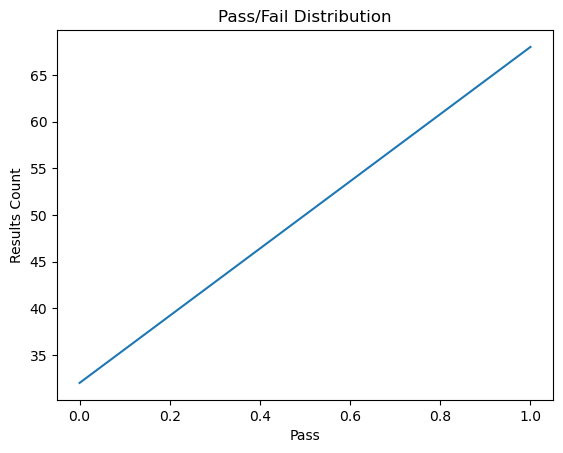

In [6]:
# Plot the distribution of the target variable
data['Results'].value_counts().plot(kind='line')
plt.title('Pass/Fail Distribution')
plt.xlabel('Pass')
plt.ylabel('Results Count')
plt.show()


## Fit a model using logistic regression

In [7]:
# Define the feature matrix (X) and target variable (y)
X = data.drop('Results', axis=1)  # Features
y = data['Results']  # Target variable

# Initialize and fit the logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X, y)

# Predict probabilities of passing (class 1)
y_pred_prob = model.predict_proba(X)[:, 1]

# Predict classes (0 or 1)
y_pred = model.predict(X)


## Output model coefficients and performance metrics such as accuracy and AUC and ROC

Model Coefficients:
Feature Hours_Studied: 0.9252
Feature Review_Session: 1.1047
Intercept: -2.7787
Accuracy: 0.90
ROC AUC: 0.97


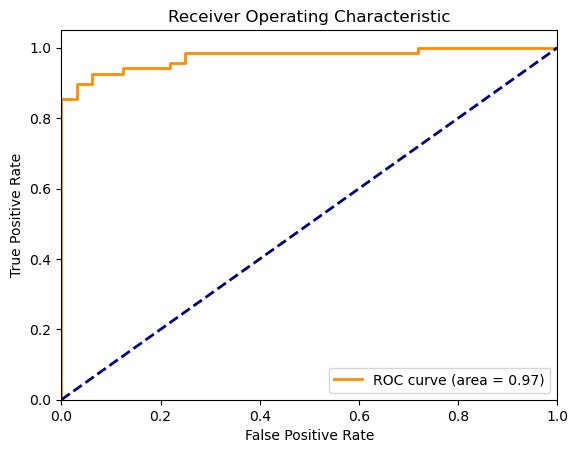

In [8]:
# Display the model coefficients
coefficients = model.coef_[0]
intercept = model.intercept_[0]
print("Model Coefficients:")
for i, coef in enumerate(coefficients):
    print(f"Feature {X.columns[i]}: {coef:.4f}")
print(f"Intercept: {intercept:.4f}")

# Calculate and display model performance metrics
accuracy = accuracy_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_prob)
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Task 2: Write code to fit a Support Vector Machine model using (1) linear kernel and (2) RBF kernel. For the RBF kernel, use grid search to find the best gamma parameter using k-fold cross-validation. 


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("student_data.csv")

# Define the feature matrix (X) and target variable (y)
X = data.drop('Results', axis=1)
y = data['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit an SVM model with a linear kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Predict with the linear SVM model
y_pred_linear = linear_svm.predict(X_test)

# Calculate accuracy for the linear SVM
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy of Linear SVM:", accuracy_linear)

# Fit an SVM model with an RBF kernel using grid search for gamma
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1]
}

rbf_svm = SVC(kernel='rbf')
grid_search = GridSearchCV(rbf_svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
best_gamma = best_params['gamma']
best_C = best_params['C']

# Train the RBF SVM with the best parameters
rbf_svm_best = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
rbf_svm_best.fit(X_train, y_train)

# Predict with the RBF SVM model
y_pred_rbf = rbf_svm_best.predict(X_test)

# Calculate accuracy for the RBF SVM
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy of RBF SVM:", accuracy_rbf)


Accuracy of Linear SVM: 0.85
Accuracy of RBF SVM: 0.85
